# Исследование данных о продажах игр.
- Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
- Цель работы-выявить определяющие успешность игры закономерности, которые в дальнейшем помогут спланировать рекламные компании.
- Задачи работы-нужно отработать принцип работы с данными, провести анализ данных, для выявления закономерностей между продажами и свойствами игр, определить какие игры выгодно продавать.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

План работы:
- Открытие файла с данными и изучение общей информации
- Подготовка данных
- Исследовательский анализ данных
- Составление портрета пользователя каждого региона
- Проверка гипотез
- Общий вывод

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Шаг 1. Открытие файла с данными и изучение общей информации

In [ ]:
df= pd.read_csv("/datasets/games.csv")

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Подготовка данных

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Необходимо привести значения в столбцах year_of_release и user_score к типам данных int и float, для удобства дальнейшего анализа и из логических соображений.

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'] , errors='coerce')
df['year_of_release'] = df['year_of_release'].fillna(pd.NA)
df['year_of_release'] = df['year_of_release'].astype('Int64')

Значения "tbd" были заменены на NAN для удобности в анализе, предположительно аббревиатура означает "to be defined".

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В имеющихся данных пропущенные значения мы можем заменить только в столбцах name и genre, замена пропусков( или их удаление) приведет к неполноте анализа данных.

In [ ]:
df["name"]=df["name"].fillna(" ")
df["genre"]=df["genre"].fillna(" ")

In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["rating"]=df["rating"].fillna("undefined")

К пропускам могли привести такие причины, как невнимательность, отсутствие данных, технические ошибки при создании данных.

In [ ]:
df["sales"]=df["na_sales"]+df["eu_sales"]+df["jp_sales"]+df['other_sales']

# Шаг 3. Исследовательский анализ данных

<AxesSubplot:>

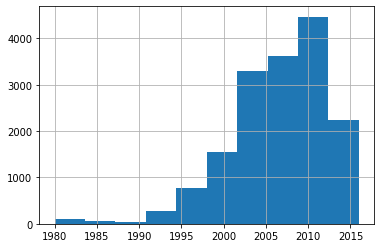

In [ ]:
df["year_of_release"].hist()

По графику можно наблюдать подъем продаж игр после 1990, а затем спад после 2010 года

<AxesSubplot:xlabel='platform'>

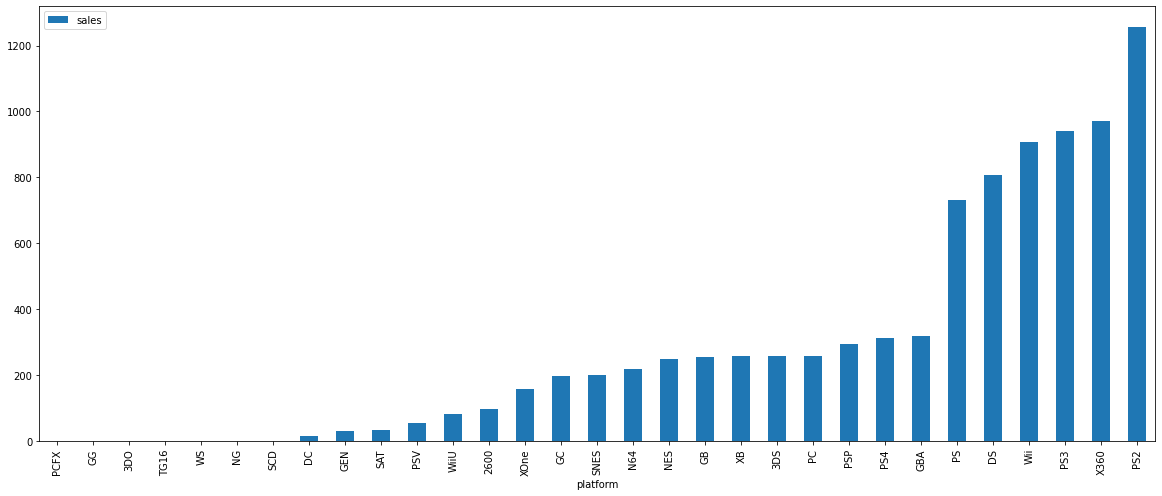

In [ ]:
data=df.pivot_table(index = 'platform', values = "sales"  , aggfunc = 'sum')
data = data.sort_values(by='sales')
data.plot(kind="bar",figsize=(20,8))

По графику видно, что топ 5 платформ- Wii, DS, PS2, PS3, X360.

platform
Wii    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_of_release, dtype: object

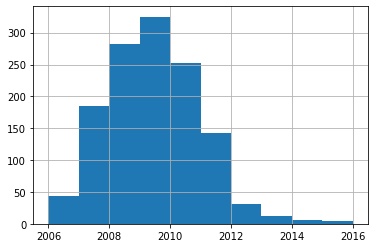

In [ ]:
data=df.loc[df["platform"]=="Wii"]
data.groupby("platform")["year_of_release"].hist()

platform
DS    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_of_release, dtype: object

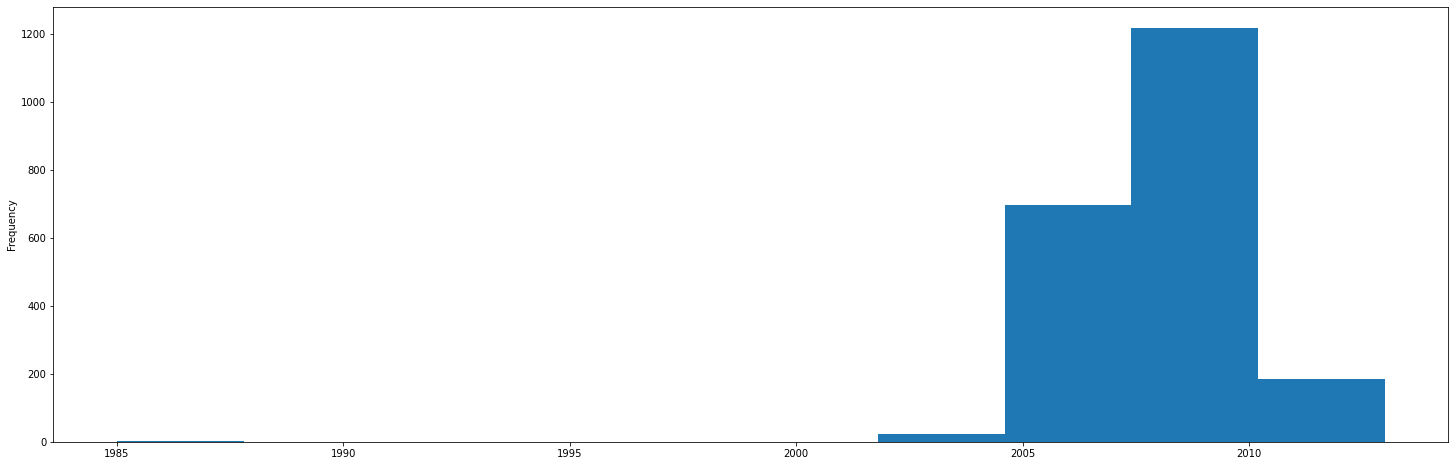

In [ ]:
data=df.loc[df["platform"]=="DS"]
data.groupby("platform")["year_of_release"].plot(kind="hist", x="year_of_release", figsize=(25,8))
#возможно, график имеет странную форму из-за недостатка данных в таблице с 1985 по 2005,
#но это никак не повлияет на дальнейший анализ, так как мы будем брать данны с 2013 года, которые представленны в таблице

In [ ]:
data=df.loc[df["platform"]=="DS"]
data["year_of_release"].unique()

<IntegerArray>
[2006, 2005, 2010, 2009, 2004, 2007, 2012, 2008, 2011, <NA>, 2013, 1985]
Length: 12, dtype: Int64

In [ ]:
data[data["year_of_release"]==1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


Платформа была выпущена в 1985 году, закончила жизнь в 2013 году, кроме того имеет данные без установленного года, можно предположить, что это могут быть за период с 1985 по 2004, но это не точно, заполнить эти данные мы не можем, так как нет точной уверенности,что они именно за этот период. В принципе можно удалить значение для 1985 годаи построить график не учитывая это значение.

platform
DS    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_of_release, dtype: object

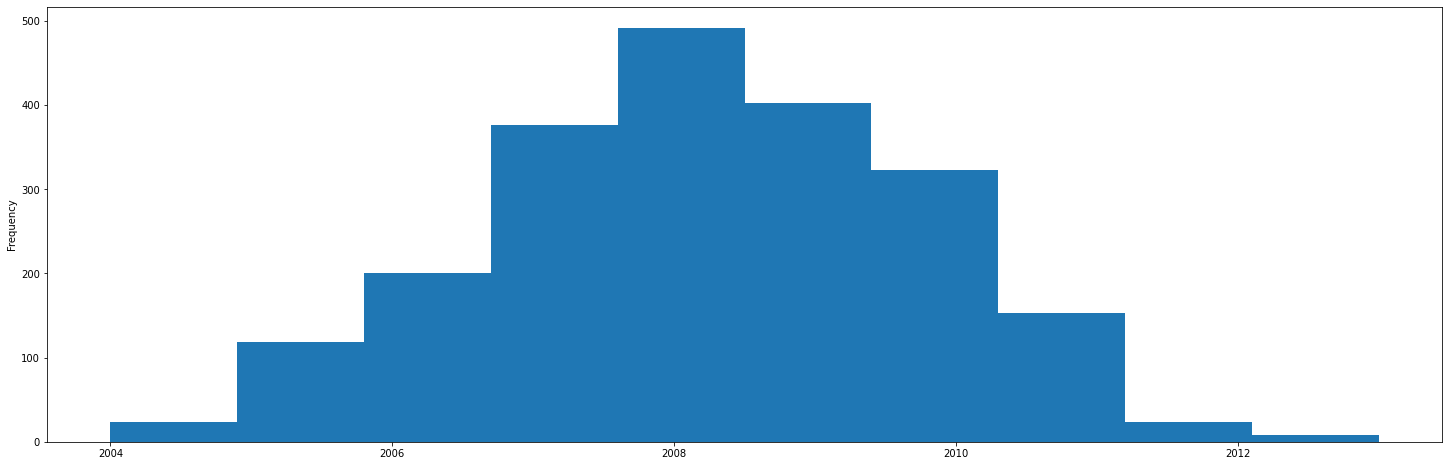

In [ ]:
data=df.loc[df["platform"]=="DS"]
data=data[data["year_of_release"]!=1985]
data.groupby("platform")["year_of_release"].plot(kind="hist", x="year_of_release", figsize=(25,8))

platform
PS2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_of_release, dtype: object

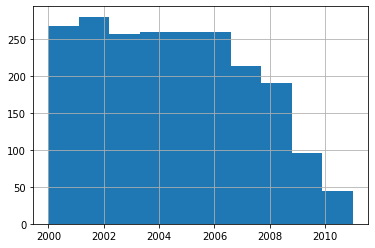

In [ ]:
data=df.loc[df["platform"]=="PS2"]
data.groupby("platform")["year_of_release"].hist()

platform
PS3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_of_release, dtype: object

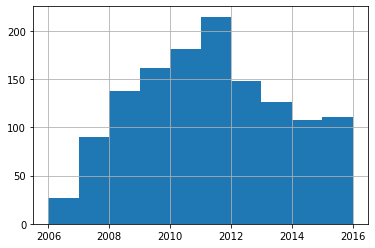

In [ ]:
data=df.loc[df["platform"]=="PS3"]
data.groupby("platform")["year_of_release"].hist()

platform
X360    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_of_release, dtype: object

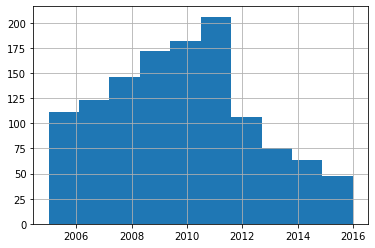

In [ ]:
data=df.loc[df["platform"]=="X360"]
data.groupby("platform")["year_of_release"].hist()

Средняя продолжительность жизни платформ составляет около 10 лет, однако, так как спад популярности платформы происходит примерно за 3 года, поэтому возьмем данные за последние 3 лет для последующего анализа.

In [ ]:
df=df.loc[df["year_of_release"]>=2013]

In [ ]:
df["platform"].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

<AxesSubplot:xlabel='year_of_release'>

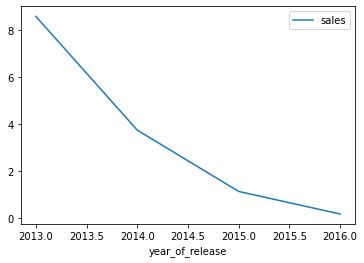

In [ ]:
data=df.loc[df["platform"]=="Wii"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

In [ ]:
data=df.loc[df["platform"]=="DS"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data

,sales
year_of_release,
2013,1.54


<AxesSubplot:xlabel='year_of_release'>

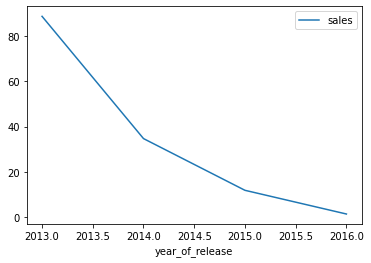

In [ ]:
data=df.loc[df["platform"]=="X360"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

<AxesSubplot:xlabel='year_of_release'>

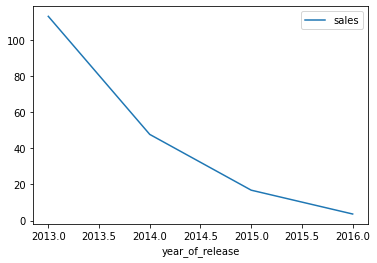

In [ ]:
data=df.loc[df["platform"]=="PS3"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

<AxesSubplot:xlabel='year_of_release'>

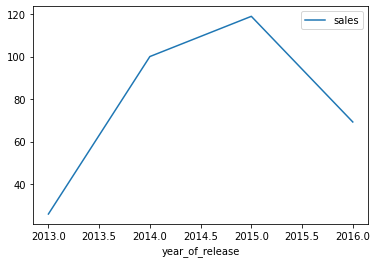

In [ ]:
data=df.loc[df["platform"]=="PS4"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

<AxesSubplot:xlabel='year_of_release'>

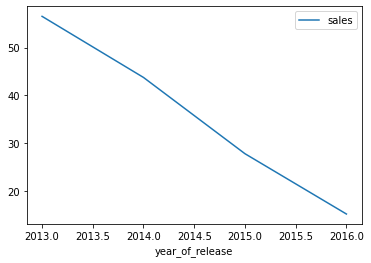

In [ ]:
data=df.loc[df["platform"]=="3DS"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

<AxesSubplot:xlabel='year_of_release'>

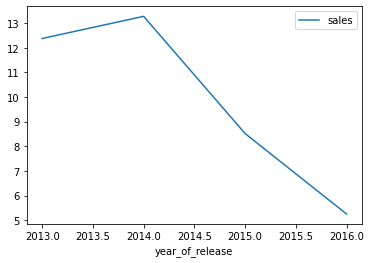

In [ ]:
data=df.loc[df["platform"]=="PC"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

<AxesSubplot:xlabel='year_of_release'>

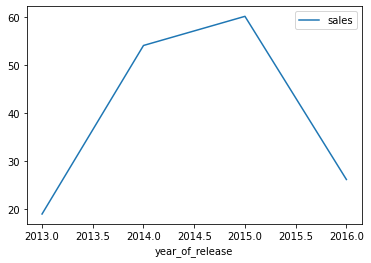

In [ ]:
data=df.loc[df["platform"]=="XOne"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

<AxesSubplot:xlabel='year_of_release'>

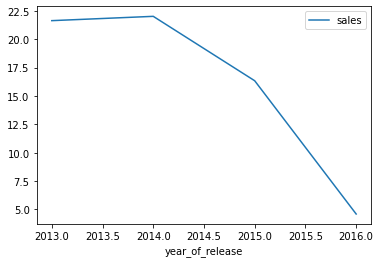

In [ ]:
data=df.loc[df["platform"]=="WiiU"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

<AxesSubplot:xlabel='year_of_release'>

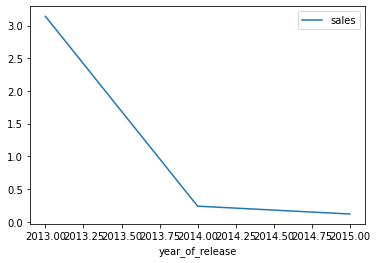

In [ ]:
data=df.loc[df["platform"]=="PSP"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

<AxesSubplot:xlabel='year_of_release'>

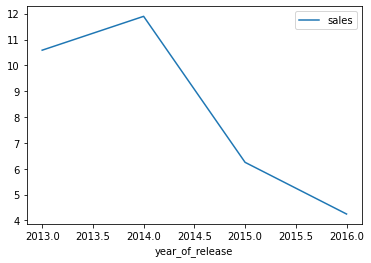

In [ ]:
data=df.loc[df["platform"]=="PSV"]
data=data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
data.plot()

По полученным графикам видно, что по продажам лидируют такие платформы как PS4, XOne и 3DC.

count    23.000000
mean      0.593913
std       0.915432
min       0.010000
25%       0.045000
50%       0.180000
75%       0.755000
max       3.580000
Name: sales, dtype: float64

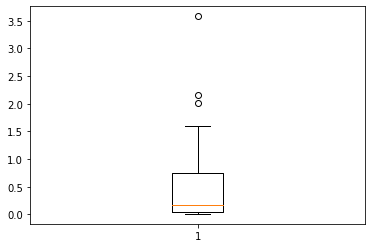

In [ ]:
data=df.loc[df["platform"]=="Wii"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

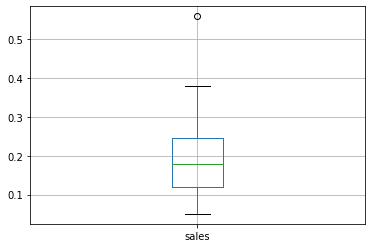

In [ ]:
data=df.loc[df["platform"]=="Wii"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    8.000000
mean     0.192500
std      0.172026
min      0.030000
25%      0.067500
50%      0.150000
75%      0.252500
max      0.510000
Name: sales, dtype: float64

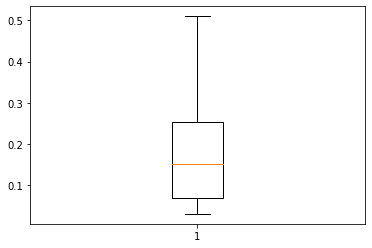

In [ ]:
data=df.loc[df["platform"]=="DS"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

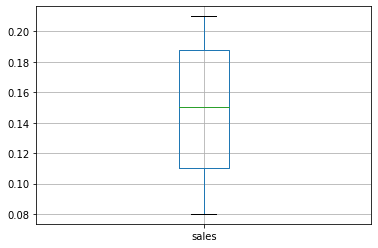

In [ ]:
data=df.loc[df["platform"]=="DS"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: sales, dtype: float64

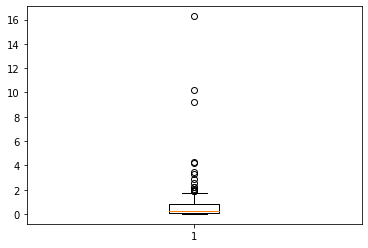

In [ ]:
data=df.loc[df["platform"]=="X360"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

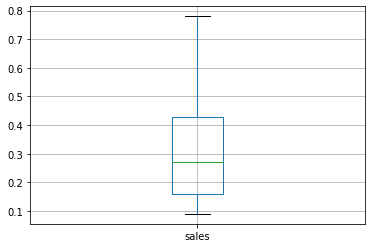

In [ ]:
data=df.loc[df["platform"]=="X360"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: sales, dtype: float64

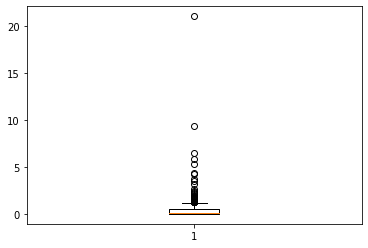

In [ ]:
data=df.loc[df["platform"]=="PS3"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

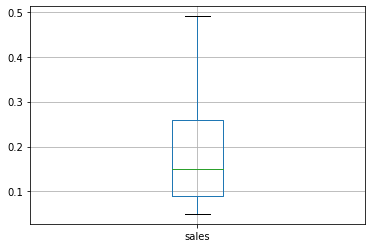

In [ ]:
data=df.loc[df["platform"]=="PS3"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales, dtype: float64

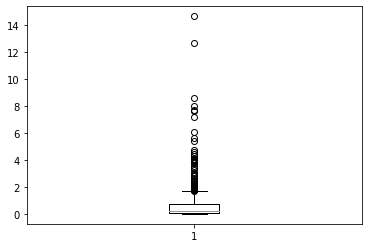

In [ ]:
data=df.loc[df["platform"]=="PS4"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

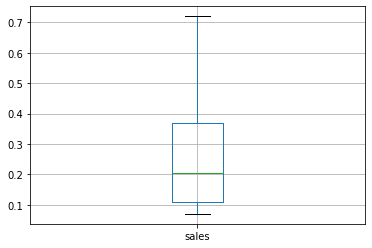

In [ ]:
data=df.loc[df["platform"]=="PS4"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: sales, dtype: float64

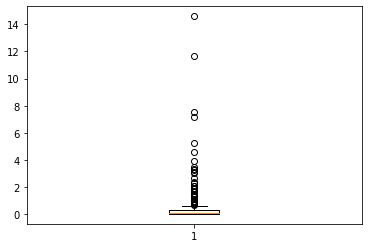

In [ ]:
data=df.loc[df["platform"]=="3DS"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

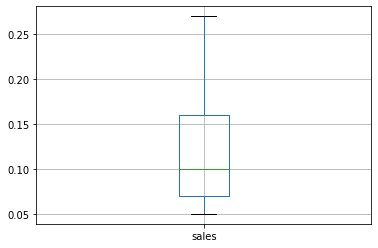

In [ ]:
data=df.loc[df["platform"]=="3DS"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    189.000000
mean       0.208624
std        0.352304
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: sales, dtype: float64

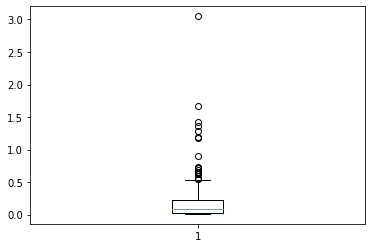

In [ ]:
data=df.loc[df["platform"]=="PC"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

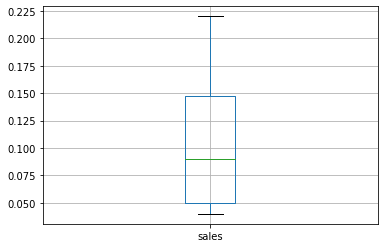

In [ ]:
data=df.loc[df["platform"]=="PC"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sales, dtype: float64

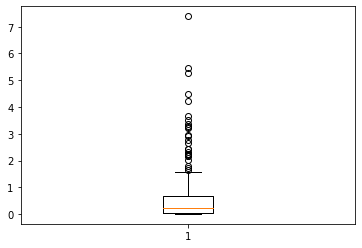

In [ ]:
data=df.loc[df["platform"]=="XOne"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

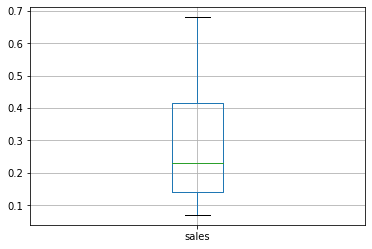

In [ ]:
data=df.loc[df["platform"]=="XOne"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: sales, dtype: float64

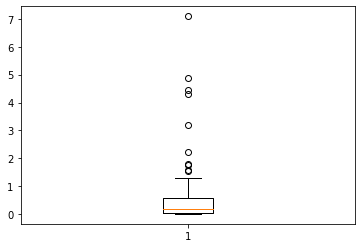

In [ ]:
data=df.loc[df["platform"]=="WiiU"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

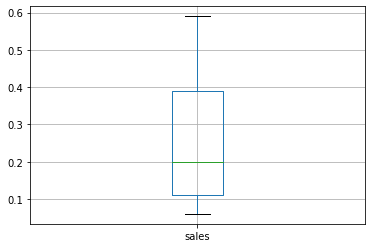

In [ ]:
data=df.loc[df["platform"]=="WiiU"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    67.000000
mean      0.052239
std       0.059768
min       0.010000
25%       0.015000
50%       0.020000
75%       0.070000
max       0.240000
Name: sales, dtype: float64

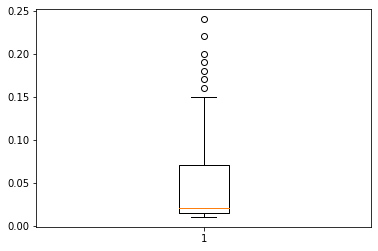

In [ ]:
data=df.loc[df["platform"]=="PSP"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

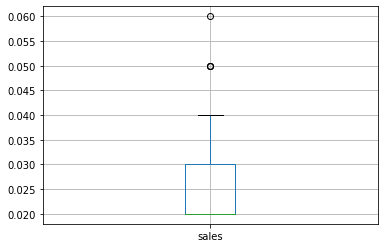

In [ ]:
data=df.loc[df["platform"]=="PSP"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

count    358.000000
mean       0.092151
std        0.153816
min        0.010000
25%        0.020000
50%        0.040000
75%        0.110000
max        1.960000
Name: sales, dtype: float64

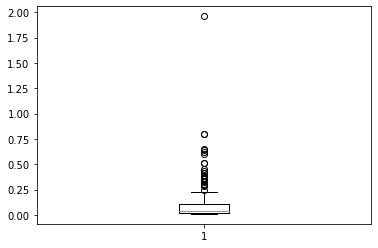

In [ ]:
data=df.loc[df["platform"]=="PSV"]
plt.boxplot(x=data['sales'])
data["sales"].describe()

<AxesSubplot:>

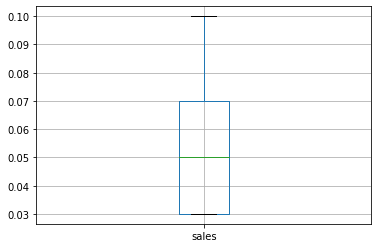

In [ ]:
data=df.loc[df["platform"]=="PSV"]
Q1 = data['sales'].quantile(0.25)
Q3 = data['sales'].quantile(0.75)
data1 = data[(data['sales'] > Q1) & (data['sales'] < Q3)]
data1.boxplot(column="sales")

По полученным данным можно отметить, что наибольшие медианные значения соответствуют платформам PS3 и X360. Так как выбросы-это нетипичные наблюдения(которые значительно отличаются от остальной части набора данных), возможно, выбросы в данных для платформ  говорят о возможных ошибках при фиксировании данных, случайности или же об уникальности.

0.40656790206178095


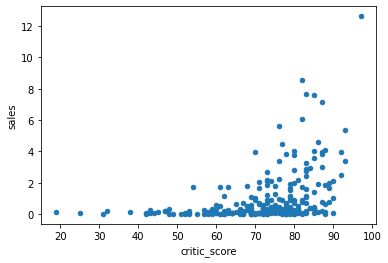

In [ ]:
data=df.loc[df["platform"]=="PS4"]
data.plot(x='critic_score', y='sales', kind='scatter')
print(data['critic_score'].corr(data['sales']))

-0.031957110204556376


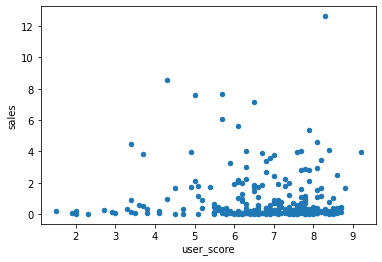

In [ ]:
data=df.loc[df["platform"]=="PS4"]
data.plot(x='user_score', y='sales', kind='scatter')
print(data['user_score'].corr(data['sales']))

0.3342853393371919


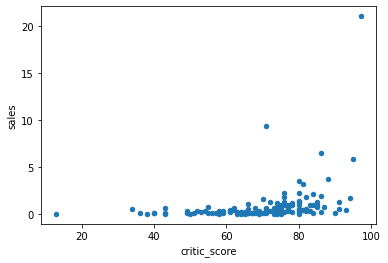

In [ ]:
data=df.loc[df["platform"]=="PS3"]
data.plot(x='critic_score', y='sales', kind='scatter')
print(data['critic_score'].corr(data['sales']))

0.0023944027357566925


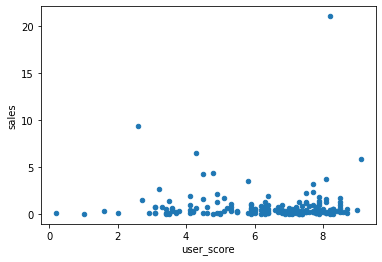

In [ ]:
data=df.loc[df["platform"]=="PS3"]
data.plot(x='user_score', y='sales', kind='scatter')
print(data['user_score'].corr(data['sales']))

0.4169983280084017


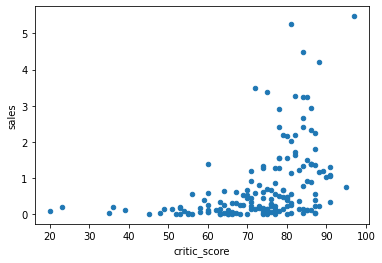

In [ ]:
data=df.loc[df["platform"]=="XOne"]
data.plot(x='critic_score', y='sales', kind='scatter')
print(data['critic_score'].corr(data['sales']))

-0.06892505328279414


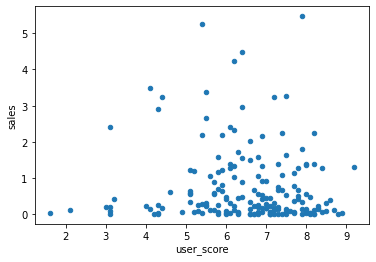

In [ ]:
data=df.loc[df["platform"]=="XOne"]
data.plot(x='user_score', y='sales', kind='scatter')
print(data['user_score'].corr(data['sales']))

Корреляцией между оценками пользователей и продажами нет, корреляция между оценками критиков и продажами 0,4. По графику можно сказать, что игры лучше продаются с высокой оцекой критиков(данный вывод подтверждают данные по 3 платформам).

<AxesSubplot:xlabel='genre'>

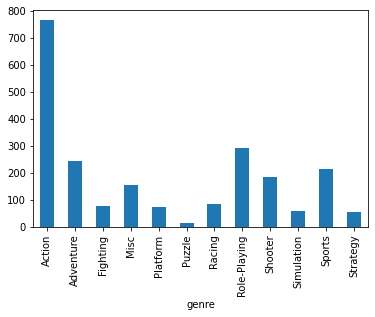

In [ ]:
data=df.groupby("genre")["genre"].count()
data.plot.bar()

Больше всего игр в жанре Action, Sports и Misc.

<AxesSubplot:xlabel='genre'>

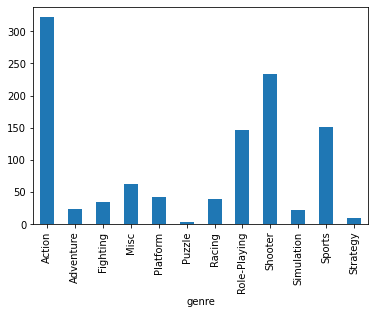

In [ ]:
data=df.groupby("genre")["sales"].sum()
data.plot.bar()

Больше всего покупают игры жанра Action(это может быть связано с тем, что игр данного жанра выпускается больше всех остальных),
Sports на втором месте по продажам и по количеству выпускаемых игр.
Shooter на третьем месте по продажам, хотя игр данного жанра производится меньше.

In [ ]:
data=df.pivot_table(index='genre', values='sales', aggfunc=['count',"median","mean"])
data

,count,median,mean
,sales,sales,sales
genre,,,
Action,766,0.110,0.420196
Adventure,245,0.030,0.096490
Fighting,80,0.125,0.441375
Misc,155,0.100,0.405290
Platform,74,0.225,0.576081
Puzzle,17,0.060,0.186471
Racing,85,0.120,0.469294
Role-Playing,292,0.125,0.499623


По таблице видно, что не всегда количество игр жанра гарантирует хорошие продажи. Так большое количество продаж у жанра Action соответствует далеко не самому большому медианному значению, однако высокое количество продаж соответствует высокому медианному значению. Отметим, что имеется в данных ситуация, когда медианное значение продаж приближается к максимальному, но количество выпущенных игр небольшое.

# Шаг 4. Составление портрета пользователя каждого региона

<AxesSubplot:xlabel='platform'>

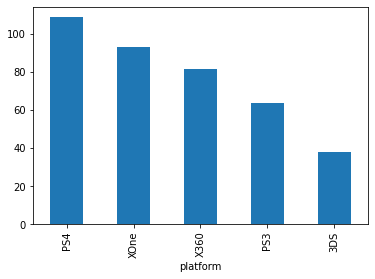

In [ ]:
df.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:xlabel='platform'>

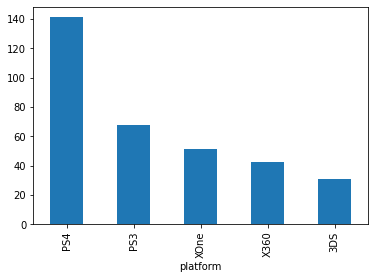

In [ ]:
df.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:xlabel='platform'>

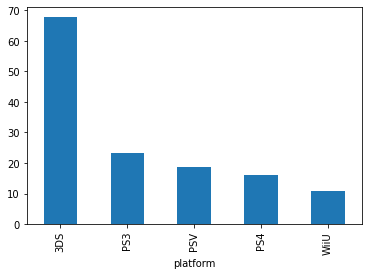

In [ ]:
df.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5).plot.bar()

5 популярных платформы в разном регионе:
- Северная Америка: PS4, XOne, X360, PS3, 3DS
- Европа:PS4, PS3, XOne, X360, 3DS
- Япония:3DS, PS3, PSV, PS4, WiiU

<AxesSubplot:xlabel='genre'>

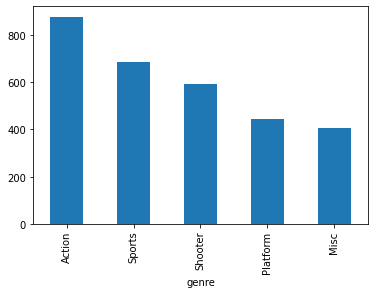

In [ ]:
df.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:xlabel='genre'>

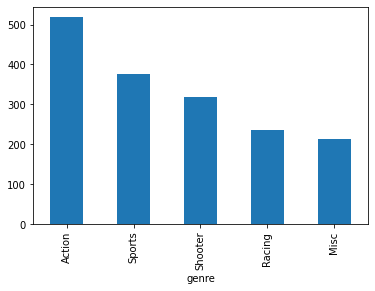

In [ ]:
df.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:xlabel='genre'>

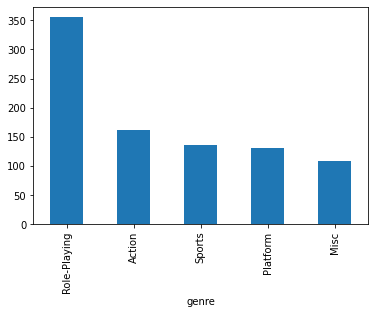

In [ ]:
df.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5).plot.bar()

5 популярных жанра игр в разном регионе:
- Северная Америка:Action, Shooter, Sports, Role-Playing, Misc
- Европа:Action, Shooter, Sports, Role-Playing, Racing
- Япония:Role-Playing, Action, Misc, Fighting, Shooter

In [ ]:
data = df.pivot_table(index = 'rating', values = ['na_sales','jp_sales','eu_sales']  , aggfunc = 'sum')
data

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
undefined,78.91,85.05,89.42


- В Северной Америке большим успехом пользуются игры подходящие для лиц старше 17 лет(M), затем игры без рейтинга и игры подходящие для всех возрастных категорий(E).
- В Европе большим успехом пользуются игры подходящие для лиц старше 17 лет(M) и игры подходящие для всех возрастных категорий(E), а также высокая доля продаж игр без рейтинга.
- В Японии большим успехом пользуются игры  без рейтинга, затем подходящие для лиц старше 13 лет(T) и игры подходящие для всех возрастных категорий(E).

# Шаг 5. Проверка гипотез

Гипотеза 1-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Нулевая-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная-Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [ ]:
sample_1 = df[df['platform']=="XOne"]['user_score'].dropna()
sample_2 = df[df['platform']=="PC"]['user_score'].dropna()

In [ ]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Гипотеза 2-Средние пользовательские рейтинги жанров Action и Sports разные
- Нулевая-Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная-Средние пользовательские рейтинги жанров Action и Sports разные

In [ ]:
sample_3 = df[df['genre']=="Action"]['user_score'].dropna()
sample_4 = df[df['genre']=="Sports"]['user_score'].dropna()

In [ ]:
alpha = 0.05

results1 = st.ttest_ind(sample_3, sample_4, equal_var = False)

print('p-значение:', results1.pvalue)

if results1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


В результате была отвергнута нулевая теория в каждой гипотезе, а значит, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports разные.

- H₀ всегда формулируется так, чтобы использовать знак равенства. Исходя из H₀ формулируется альтернативная гипотеза H₁.Пользуясь этими принципами мы сформулировали нулевую и альтернативную гипотезы.
- Для проверки гипотез применили t-тест, потому что было необходимо сравнивать средние двух генеральных совокупностей между собой.

# Шаг 6. Общий вывод

В ходе работы с данными был проведен исследовательский анализ.
- Предварительно была проведена обработка данных: замена типов данных в столбцах, в которых это необходимо, замена пропущенных значений, где необходимо, приведение к нижнему регистру названия столбцов, создание нового столбца, содержащего суммарные продажи во всех регионах.
- На первом этапе анализа были определены топ 5 платформ(Wii, DS, PS2, PS3, X360), средняя продолжительность существования платформы(около 10 лет), лидирующие по продажам платформы(PS4, XOne и 3DC) и рассмотрено наличие/отсутствие зависимости уровня продаж от рейтинга критиков и рейтинга пользователей(корреляцией между оценками пользователей и продажами нет, корреляция между оценками критиков и продажами 0.4, игры лучше продаются с высокой оцекой критиков), кроме того были определены наиболее продаваемые жанры игр(Action, Sports, Shooter) и наиболее выпускаемые игры(больше всего игр в жанре Action, Sports и Misc). Заметим, что не всегда количество игр жанра гарантирует хорошие продажи. Так большое количество продаж у жанра Action соответствует далеко не самому большому медианному значению, однако высокое количество продаж соответствует высокому медианному значению. Отметим, что имеется в данных ситуация, когда медианное значение продаж приближается к максимальному, но количество выпущенных игр небольшое.
- На втором этапе был составлен портрет пользователей в зависимости от региона:

  5 популярных платформы в разном регионе:
  - Северная Америка: PS4, XOne, X360, PS3, 3DS
  - Европа:PS4, PS3, XOne, X360, 3DS
  - Япония:3DS, PS3, PSV, PS4, WiiU
  
  5 популярных жанра игр в разном регионе:
  - Северная Америка:Action, Shooter, Sports, Role-Playing, Misc
  - Европа:Action, Shooter, Sports, Role-Playing, Racing
  - Япония:Role-Playing, Action, Misc, Fighting, Shooter
  
  Распределение по рейтингу игр:
  - В Северной Америке большим успехом пользуются игры подходящие для лиц старше 17 лет(M), затем игры без рейтинга и игры подходящие для всех возрастных категорий(E).
  - В Европе большим успехом пользуются игры подходящие для лиц старше 17 лет(M) и игры подходящие для всех возрастных категорий(E), а также высокая доля продаж игр без рейтинга.
  - В Японии большим успехом пользуются игры  без рейтинга, затем подходящие для лиц старше 13 лет(T) и игры подходящие для всех возрастных категорий(E).
  
- На третьем этапе была проведена проверка гипотез с использованием t-теста и было определено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports разные.
- В результате анализа можно сказать, что выгодно продавать игры с высоким рейтингов критиков, в жанре Action, на платформах PS4, XOne и PC.